In [60]:
generate_matrix = T
source("load_matrix.R")

# We have the sce object, scater, and singlecellexperiment, fully annotated
library(SingleCellExperiment)

Regenerating matrix from source file matrix.rds...
Warning message in is.na(feature_info_full$feature_symbol):
“is.na() applied to non-(list or vector) of type 'NULL'”49671 genes x 192 cells. (192) unique barcodes.


In [62]:
head(counts(sce))

,GGTAGA,ATCGTG,ATGGAC,AGTAGG,CCATCA,AGTACC,CCAGTA,CGTTAC,GAGGTA,TTGGCA,⋯,CGTCTA,CCATAG,TTCCAG,GGACAA,ACTTCG,TTGTGC,GGTATG,CTGCTA,ATGAGG,ACGTTG
ENSMUSG00000000001,8,7,3,3,1,1,0,16,4,9,⋯,2,1,4,3,4,4,0,2,10,2
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,0,0,1,1,0,8,3,1,2,1,⋯,2,0,2,2,5,1,1,0,3,2
ENSMUSG00000000031,61,94,47,66,5,37,38,60,101,78,⋯,50,45,74,51,77,84,40,48,110,26
ENSMUSG00000000037,0,0,0,0,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
ENSMUSG00000000049,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# 1. Filter cells

Max seq depth before drop in cell numbers: 4140


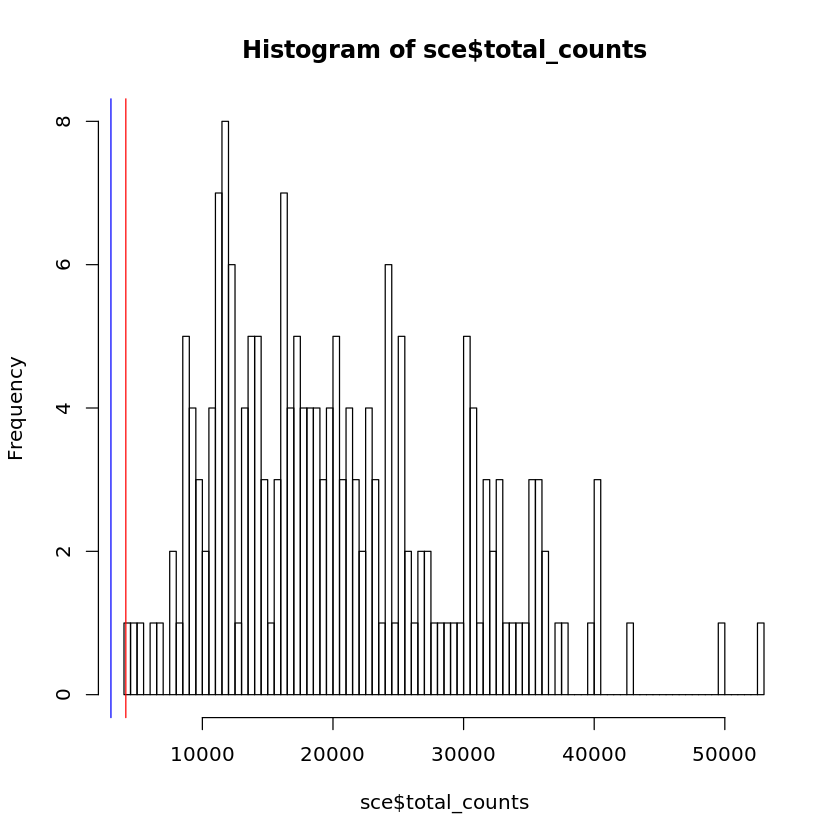

In [115]:
sce <- calculateQCMetrics(sce)
hist(sce$total_counts, breaks = 100)
ab_gruen = 3000
abline(v = ab_gruen, col = "blue")

num_cells_above_depth <- function(object, depth){
    return(dim(object[,colSums(counts(object)) > depth])[[2]])
}

determine_maxseqdepth_beforeloss <- function(obj)
{
    # At bare minimum we want over 0 total trans.
    original_num <- num_cells_above_depth(obj, 0)     
    
    running_depth = 0
    iterate_step = 5000
       
    while (iterate_step > 100){
        current_count  = num_cells_above_depth(obj, running_depth)
        
        #message(current_count, "     ", running_depth, "     ", iterate_step)
              
        # Reduction, we need to step back 1/2
        if (original_num > current_count){
            running_depth = running_depth - iterate_step
            iterate_step = as.integer(iterate_step / 2)
        }
        
        running_depth = running_depth + iterate_step       
    }
    return(running_depth)
}

cutoff <- determine_maxseqdepth_beforeloss(sce)
abline(v = cutoff, col = 'red')

message("Max seq depth before drop in cell numbers: ", cutoff)


#hist(sce$total_features, breaks = 100)
#abline(v = 3500, col = "red")
#cells_filtered_hem <- 
#cells_filtered_hem

Here we will clear any cells with total transcripts less than 4140 (red) despite Grün removing only 3000 (blue) from his sets. 4140 is automatically derived from the max seq depth before the number of cells drop below the original amount (192)

In [ ]:
# Fill this with gene filtering

# Okay, tonight - try to run this under raceID2 with default settings and raceID3 with default settings and see
# if you can recapitulate the results with this data set
#
# Todo:
#   - RaceID2 filtering
#   - RaceID3 filtering
#   - Scater filtering settings for RaceID2
#   - Scater filtering settings for RaceID3
#     -- Make sure the overlap of cell NAMES and gene NAMES are the same
#       not just the numbers

 - Grun does median based normalisation before filtering for cells
 - He adds a pseudocount of 0.1
 - and then filters out genes that don't have a 5 transcripts across all
 - Highlty expressed genes with more than 500 (!) transcripts after normalisation are discarded.

   The variation in our reads is pretty evenly distributed. Also the number of cells does not change if we filter for a sequencing depth higher than 4000. 